In [1]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shutil
import importlib

%matplotlib inline
from sklearn.datasets import load_files
import pandas as pd
pd.set_option("display.max_colwidth", 75)

In [2]:
# vgg19 fc layer train time
!cat ../vgg19/logs/fc_layer_train_caffe_vgg19.ps.log|cut -f5 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines(); print(sum(map(float, vals))/len(vals))'

35.95042432241981


In [3]:
vgg19_fc = 35.95042432241981

In [4]:
# vgg19 all layer train time
!cat ../vgg19/logs/all_layer_train_caffe_vgg19.ps.log|cut -f5 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

61.28210279311421


In [5]:
vgg19_all = 61.28210279311421

In [6]:
# mobilenet fc layer train time
!cat ../mobilenet/logs/fc_layer_train_mobilenet.py.ps.log|cut -f5 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

40.399700041799484


In [7]:
mobilenet_fc = 40.399700041799484

In [8]:
# mobilenet all layer train time
!cat ../mobilenet/logs/all_layer_train_mobilenet.py.ps.log|cut -f5 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

46.06237746658866


In [9]:
mobilenet_all = 46.06237746658866

In [10]:
# inception fc layer train time
!cat ../inceptionresnetv2/logs/fc_layer_train_inceptionresnetv2.py.ps.log|cut -f5 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

42.941866698828406


In [11]:
inceptionresnetv2_fc = 42.941866698828406

In [12]:
# inception fc layer train time
!cat ../inceptionresnetv2/logs/all_layer_train_inceptionresnetv2.py.ps.log|cut -f5 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

99.74477534447158


In [13]:
inceptionresnetv2_all = 99.74477534447158

In [14]:
values = [vgg19_fc, vgg19_all, mobilenet_fc, mobilenet_all, inceptionresnetv2_fc,inceptionresnetv2_all]

In [15]:
min_value= min(values)

In [16]:
print([round(v/min_value, 3) for v in values])

[1.0, 1.705, 1.124, 1.281, 1.194, 2.775]


In [17]:
values

[35.95042432241981,
 61.28210279311421,
 40.399700041799484,
 46.06237746658866,
 42.941866698828406,
 99.74477534447158]

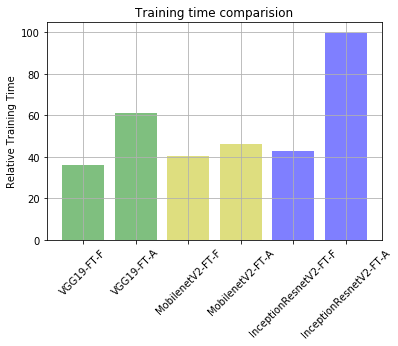

In [18]:
x_vals = ('VGG19-FT-F', 'VGG19-FT-A', 'MobilenetV2-FT-F', 'MobilenetV2-FT-A', 'InceptionResnetV2-FT-F', 'InceptionResnetV2-FT-A')
y_pos = np.arange(len(x_vals))

y_vals = values
colors = ['g', 'g', 'y', 'y', 'b', 'b']
plt.bar(y_pos, y_vals, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, x_vals, rotation=45)
plt.ylabel('Relative Training Time')
plt.title('Training time comparision')
plt.grid(True)
plt.show()
plt.savefig('../imgs/training_cpu_usage_comparision.png')